In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sales_data.csv")

In [3]:
data.head()

,Unnamed: 0,saller_id,customer_id,product_id,quantity,price,date
0,0,21,359,5,8,29,2022-03-14
1,1,18,424,15,4,60,2022-05-28
2,2,14,473,9,9,73,2022-09-19
3,3,9,720,9,3,89,2022-12-31
4,4,7,31,8,1,26,2022-06-28


In [4]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
data

,saller_id,customer_id,product_id,quantity,price,date
0,21,359,5,8,29,2022-03-14
1,18,424,15,4,60,2022-05-28
2,14,473,9,9,73,2022-09-19
3,9,720,9,3,89,2022-12-31
4,7,31,8,1,26,2022-06-28
...,...,...,...,...,...,...
195,29,891,13,8,12,2022-01-10
196,16,616,19,9,54,2022-02-16
197,20,318,4,7,26,2022-11-11
198,5,447,7,6,88,2022-07-24


# sales per quarter [Bar Plot]

In [6]:
# quarter Information

In [7]:
quarter_info = data[['price','date']]

In [8]:
quarter_info[:5]

,price,date
0,29,2022-03-14
1,60,2022-05-28
2,73,2022-09-19
3,89,2022-12-31
4,26,2022-06-28


In [ ]:
quarter_info.date.iloc[0]

'2022-03-14'

In [9]:
type(quarter_info.date.iloc[0])

str

In [10]:
quarter_info["date"] = pd.to_datetime(quarter_info["date"])

C:\Users\RAJA\AppData\Local\Temp\ipykernel_9488\3649251007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_info["date"] = pd.to_datetime(quarter_info["date"])


In [11]:
type(quarter_info.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
quarter_info

,price,date
0,29,2022-03-14
1,60,2022-05-28
2,73,2022-09-19
3,89,2022-12-31
4,26,2022-06-28
...,...,...
195,12,2022-01-10
196,54,2022-02-16
197,26,2022-11-11
198,88,2022-07-24


In [15]:
help(quarter_info['date'].dt)

Help on DatetimeProperties in module pandas.core.indexes.accessors object:

class DatetimeProperties(Properties)
 |  DatetimeProperties(data: 'Series', orig) -> 'None'
 |  
 |  Accessor object for datetimelike properties of the Series values.
 |  
 |  Examples
 |  --------
 |  >>> seconds_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="s"))
 |  >>> seconds_series
 |  0   2000-01-01 00:00:00
 |  1   2000-01-01 00:00:01
 |  2   2000-01-01 00:00:02
 |  dtype: datetime64[ns]
 |  >>> seconds_series.dt.second
 |  0    0
 |  1    1
 |  2    2
 |  dtype: int32
 |  
 |  >>> hours_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="h"))
 |  >>> hours_series
 |  0   2000-01-01 00:00:00
 |  1   2000-01-01 01:00:00
 |  2   2000-01-01 02:00:00
 |  dtype: datetime64[ns]
 |  >>> hours_series.dt.hour
 |  0    0
 |  1    1
 |  2    2
 |  dtype: int32
 |  
 |  >>> quarters_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="q"))
 |  >>> quarters_series
 |  0   2000

In [ ]:
quarter_info['quarter_CY'] = quarter_info['date'].dt.quarter

<ipython-input-15-80bbc4d850fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_info['quarter_CY'] = quarter_info['date'].dt.quarter


In [18]:
quarter_info

,price,date,quarter_FY
0,29,2022-03-14,4
1,60,2022-05-28,1
2,73,2022-09-19,2
3,89,2022-12-31,3
4,26,2022-06-28,1
...,...,...,...
195,12,2022-01-10,4
196,54,2022-02-16,4
197,26,2022-11-11,3
198,88,2022-07-24,2


In [16]:
# Define a custom function to calculate quarters starting from April
def custom_quarter(date):
    if date.month in [4, 5, 6]:
        return 1
    elif date.month in [7, 8, 9]:
        return 2
    elif date.month in [10, 11, 12]:
        return 3
    else:
        return 4
# Apply the custom quarter function to the 'date' column
quarter_info['quarter_FY'] = quarter_info['date'].apply(custom_quarter)


C:\Users\RAJA\AppData\Local\Temp\ipykernel_9488\127550228.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_info['quarter_FY'] = quarter_info['date'].apply(custom_quarter)


In [17]:
quarter_info

,price,date,quarter_FY
0,29,2022-03-14,4
1,60,2022-05-28,1
2,73,2022-09-19,2
3,89,2022-12-31,3
4,26,2022-06-28,1
...,...,...,...
195,12,2022-01-10,4
196,54,2022-02-16,4
197,26,2022-11-11,3
198,88,2022-07-24,2


In [19]:
import seaborn as sns

def sales_per_quarter(data,which_year):
    info = data.groupby(which_year)["price"].size()
    sns.barplot(x = info.index, y = info.values, palette="pastel")
    plt.xlabel("Analysis based on "+which_year)
    plt.ylabel("Sales")
    plt.title("Sales per "+which_year)

<ipython-input-26-c48525dd01f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = info.index, y = info.values, palette="pastel")


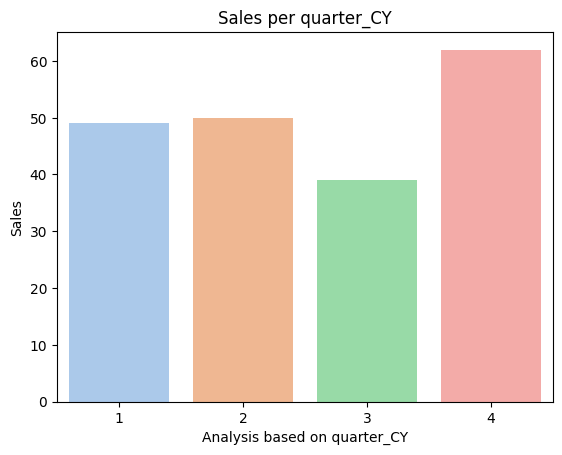

In [ ]:
sales_per_quarter(quarter_info, "quarter_CY")

<ipython-input-26-c48525dd01f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = info.index, y = info.values, palette="pastel")


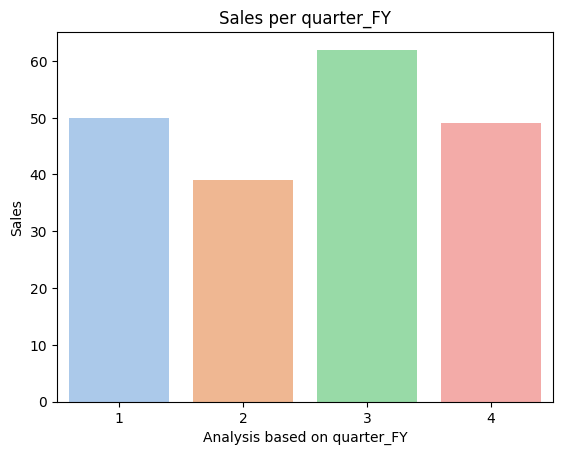

In [ ]:
sales_per_quarter(quarter_info, "quarter_FY")

# Histogram for data distribution

In [20]:
data['price']

0      29
1      60
2      73
3      89
4      26
       ..
195    12
196    54
197    26
198    88
199    39
Name: price, Length: 200, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

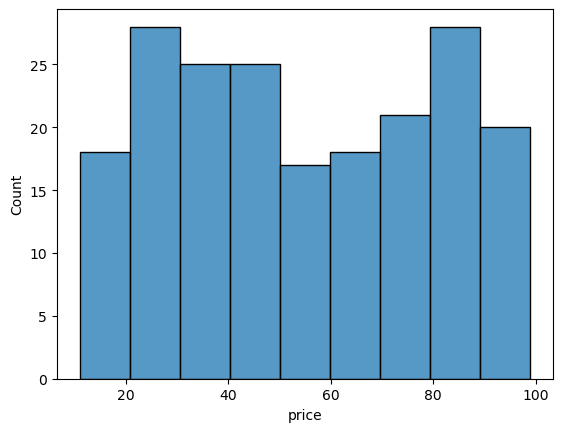

In [21]:
sns.histplot(data['price'])

<Axes: xlabel='price', ylabel='Count'>

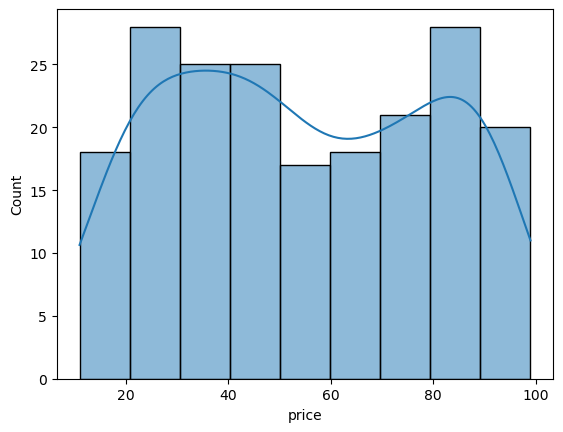

In [22]:
sns.histplot(data['price'], kde = True)

# Box plot

In [24]:
quantity = data[['quantity']]

<Axes: >

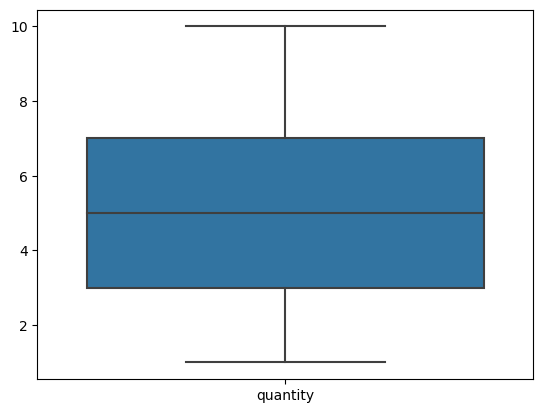

In [25]:
sns.boxplot(quantity[['quantity']])

In [26]:
quantity['quantity_data_with_outlier'] = quantity['quantity']

C:\Users\RAJA\AppData\Local\Temp\ipykernel_9488\2721641871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantity['quantity_data_with_outlier'] = quantity['quantity']


In [27]:
quantity

,quantity,quantity_data_with_outlier
0,8,8
1,4,4
2,9,9
3,3,3
4,1,1
...,...,...
195,8,8
196,9,9
197,7,7
198,6,6


In [29]:
quantity.quantity_data_with_outlier.iloc[4] = 25

C:\Users\RAJA\AppData\Local\Temp\ipykernel_9488\3979189445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantity.quantity_data_with_outlier.iloc[4] = 25


In [30]:
quantity

,quantity,quantity_data_with_outlier
0,8,8
1,4,4
2,9,9
3,3,3
4,1,25
...,...,...
195,8,8
196,9,9
197,7,7
198,6,6


<Axes: >

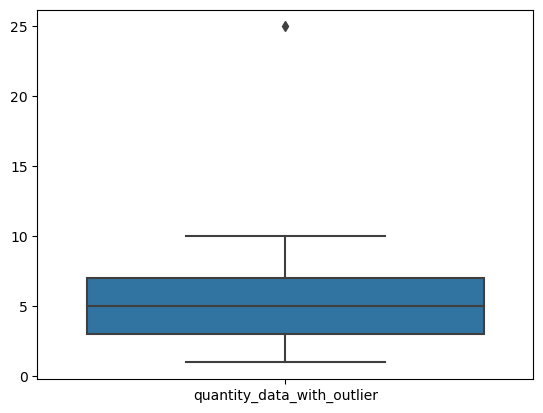

In [31]:
sns.boxplot(quantity[['quantity_data_with_outlier']])

In [32]:
# column => boxplot ==> data point/ data points outside of the boxplot premises i should conclude that in my data column outlier is persent

# product sales

In [33]:
data

,saller_id,customer_id,product_id,quantity,price,date
0,21,359,5,8,29,2022-03-14
1,18,424,15,4,60,2022-05-28
2,14,473,9,9,73,2022-09-19
3,9,720,9,3,89,2022-12-31
4,7,31,8,1,26,2022-06-28
...,...,...,...,...,...,...
195,29,891,13,8,12,2022-01-10
196,16,616,19,9,54,2022-02-16
197,20,318,4,7,26,2022-11-11
198,5,447,7,6,88,2022-07-24


In [34]:
product_sales = data.groupby('product_id')['quantity'].sum()

In [37]:
product_sales

product_id
1     61
2     64
3     32
4     98
5     70
6     51
7     61
8     50
9     84
10    65
11    21
12    38
13    49
14    47
15    75
16    38
17    51
18    43
19    36
Name: quantity, dtype: int64

In [38]:
product_sales.sort_values(ascending=True)

product_id
11    21
3     32
19    36
16    38
12    38
18    43
14    47
13    49
8     50
17    51
6     51
1     61
7     61
2     64
10    65
5     70
15    75
9     84
4     98
Name: quantity, dtype: int64

In [39]:
product_sales = product_sales.sort_values(ascending=True)

<Axes: xlabel='product_id'>

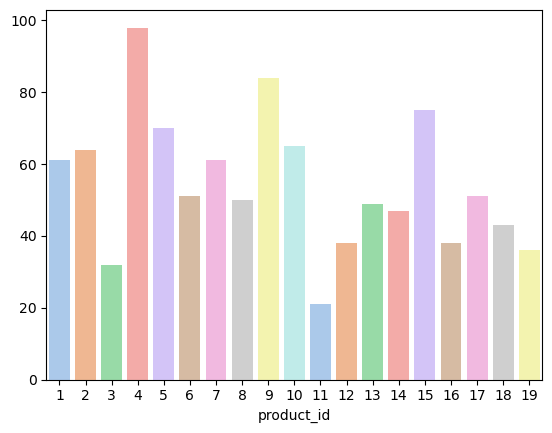

In [40]:
sns.barplot(x = product_sales.index, y = product_sales.values, palette = "pastel")

Text(0.5, 1.0, 'Product sales')

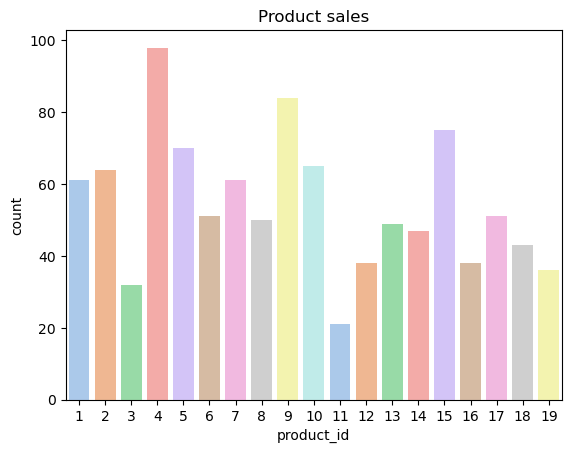

In [41]:
sns.barplot(x = product_sales.index, y = product_sales.values, palette = "pastel")
plt.ylabel("count")
plt.title("Product sales")

In [ ]:
#

# Pie Chart

In [42]:
data

,saller_id,customer_id,product_id,quantity,price,date
0,21,359,5,8,29,2022-03-14
1,18,424,15,4,60,2022-05-28
2,14,473,9,9,73,2022-09-19
3,9,720,9,3,89,2022-12-31
4,7,31,8,1,26,2022-06-28
...,...,...,...,...,...,...
195,29,891,13,8,12,2022-01-10
196,16,616,19,9,54,2022-02-16
197,20,318,4,7,26,2022-11-11
198,5,447,7,6,88,2022-07-24


In [43]:
data['product_id'].value_counts()

product_id
15    15
2     14
9     14
4     14
1     13
10    13
5     12
17    11
7     11
13    10
14    10
6      9
18     9
8      9
3      8
12     8
16     7
19     7
11     6
Name: count, dtype: int64

In [44]:
product_counts = data['product_id'].value_counts()

In [50]:
product_counts.index[0]

15

In [46]:
product_counts.index[-1]

11

In [51]:
product_counts = product_counts.sort_values()

In [52]:
product_counts

product_id
11     6
16     7
19     7
12     8
3      8
8      9
18     9
6      9
14    10
13    10
17    11
7     11
5     12
10    13
1     13
4     14
9     14
2     14
15    15
Name: count, dtype: int64

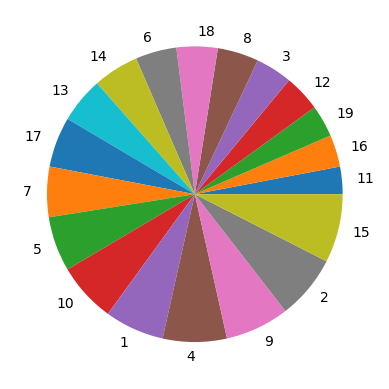

In [53]:
plt.pie(product_counts.values, labels = product_counts.index)

plt.show()

In [58]:
type(product_counts)

pandas.core.series.Series

In [54]:
explode = np.zeros(len(product_counts))

In [55]:
explode

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [56]:
explode[-1] = 0.2
explode[0] = 0.2

In [57]:
explode

array([0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0.2])

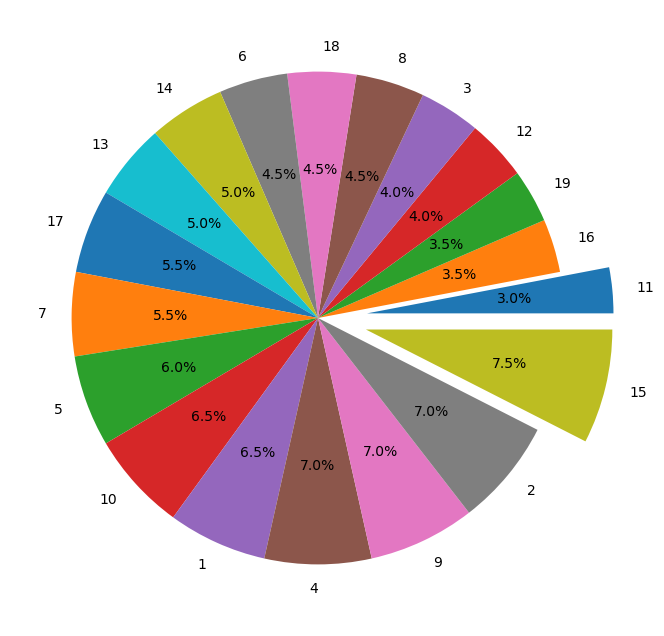

In [59]:
plt.figure(figsize=(12,8))
plt.pie(product_counts.values, labels = product_counts.index, explode = explode, autopct='%1.1f%%')
plt.show()

In [60]:
def pie_chart(data, explode_index):
  plt.figure(figsize=(12,8))
  explode = np.zeros(len(product_counts))
  for i in explode_index:
    explode[i] = 0.2
  plt.pie(data.values, labels = data.index, explode = explode, autopct='%1.1f%%')
  plt.show()

In [61]:
product_counts

product_id
11     6
16     7
19     7
12     8
3      8
8      9
18     9
6      9
14    10
13    10
17    11
7     11
5     12
10    13
1     13
4     14
9     14
2     14
15    15
Name: count, dtype: int64

In [62]:
index_dct = {}
for index,value in enumerate(product_counts.index):
  index_dct[value] = index
index_dct

{11: 0,
 16: 1,
 19: 2,
 12: 3,
 3: 4,
 8: 5,
 18: 6,
 6: 7,
 14: 8,
 13: 9,
 17: 10,
 7: 11,
 5: 12,
 10: 13,
 1: 14,
 4: 15,
 9: 16,
 2: 17,
 15: 18}

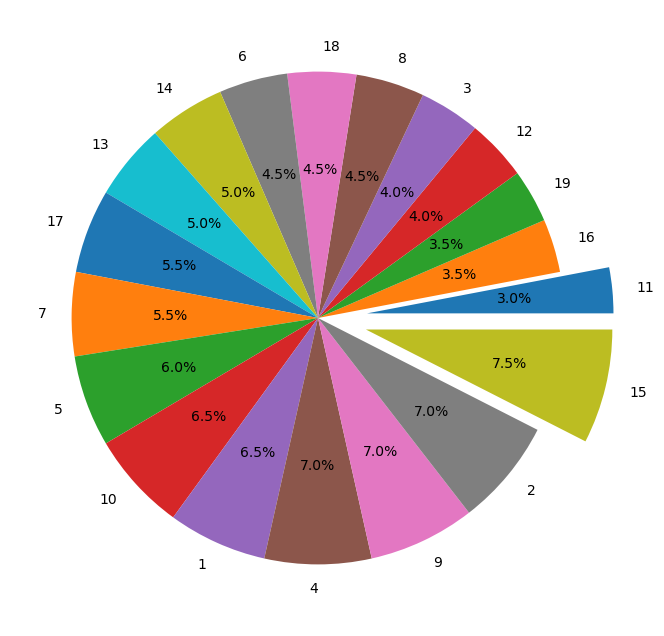

In [63]:
pie_chart(product_counts, [index_dct[11],index_dct[15]])

# Heat map

In [64]:
data.columns

Index(['saller_id', 'customer_id', 'product_id', 'quantity', 'price', 'date'], dtype='object')

In [65]:
corr_check = data[['saller_id', 'customer_id', 'product_id', 'quantity', 'price']]


In [66]:
corr_mat = corr_check.corr()

In [67]:
corr_mat

,saller_id,customer_id,product_id,quantity,price
saller_id,1.000000,0.096124,0.007238,-0.053361,-0.007741
customer_id,0.096124,1.000000,-0.120518,-0.082780,0.107364
product_id,0.007238,-0.120518,1.000000,-0.061924,-0.020068
quantity,-0.053361,-0.082780,-0.061924,1.000000,-0.137357
price,-0.007741,0.107364,-0.020068,-0.137357,1.000000


<Axes: >

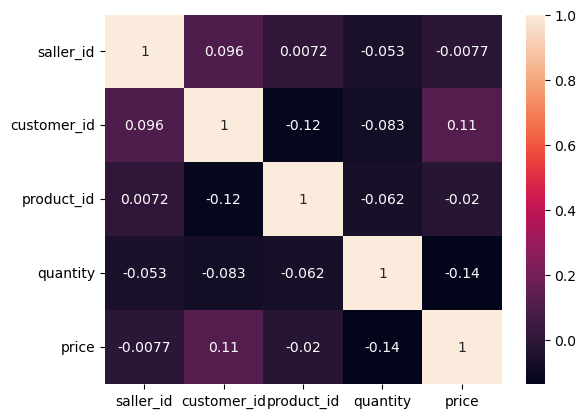

In [68]:
sns.heatmap(corr_mat, annot = True)

# word cloud

In [69]:
text_data = "Hello my name is Ajay and i will be your mentor for Data science , machine learning and deep learning"

In [71]:
from wordcloud import WordCloud

In [72]:
help(WordCloud)

Help on class WordCloud in module wordcloud.wordcloud:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defaul

In [73]:
wc = WordCloud(width = 800, height = 600, background_color="white").generate(text_data)

(-0.5, 799.5, 599.5, -0.5)

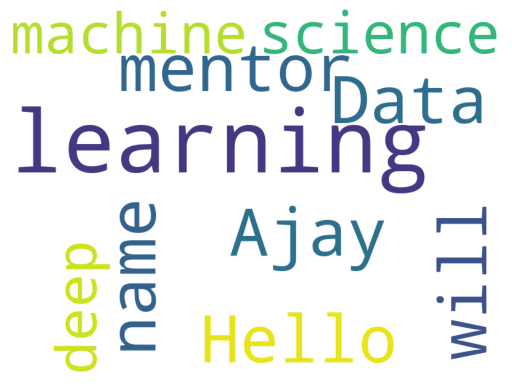

In [74]:
plt.imshow(wc)
plt.axis("off")

# DATA DISTRIBUTION (HISTOGRAM)

In [75]:
data

,saller_id,customer_id,product_id,quantity,price,date
0,21,359,5,8,29,2022-03-14
1,18,424,15,4,60,2022-05-28
2,14,473,9,9,73,2022-09-19
3,9,720,9,3,89,2022-12-31
4,7,31,8,1,26,2022-06-28
...,...,...,...,...,...,...
195,29,891,13,8,12,2022-01-10
196,16,616,19,9,54,2022-02-16
197,20,318,4,7,26,2022-11-11
198,5,447,7,6,88,2022-07-24


In [76]:
revenue = data['quantity'] * data['price']

In [77]:
df_revenue = pd.DataFrame(data = revenue, columns = ["Revenue"])

In [78]:
df_revenue

,Revenue
0,232
1,240
2,657
3,267
4,26
...,...
195,96
196,486
197,182
198,528


<Axes: xlabel='Revenue', ylabel='Count'>

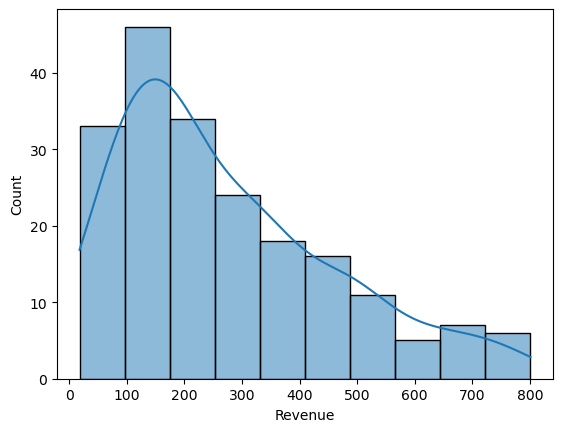

In [79]:
sns.histplot(df_revenue.Revenue, kde = True)

In [80]:
# transformation of right skewed to nearly normal distributed data using boxcox transformation

In [82]:
from scipy import stats

In [83]:
help(stats.boxcox)

Help on function boxcox in module scipy.stats._morestats:

boxcox(x, lmbda=None, alpha=None, optimizer=None)
    Return a dataset transformed by a Box-Cox power transformation.
    
    Parameters
    ----------
    x : ndarray
        Input array to be transformed.
    
        If `lmbda` is not None, this is an alias of
        `scipy.special.boxcox`.
        Returns nan if ``x < 0``; returns -inf if ``x == 0 and lmbda < 0``.
    
        If `lmbda` is None, array must be positive, 1-dimensional, and
        non-constant.
    
    lmbda : scalar, optional
        If `lmbda` is None (default), find the value of `lmbda` that maximizes
        the log-likelihood function and return it as the second output
        argument.
    
        If `lmbda` is not None, do the transformation for that value.
    
    alpha : float, optional
        If `lmbda` is None and `alpha` is not None (default), return the
        ``100 * (1-alpha)%`` confidence  interval for `lmbda` as the third
        outp

In [84]:
df_revenue["transformed_revenue"], _ = stats.boxcox(df_revenue['Revenue'])

In [85]:
df_revenue

,Revenue,transformed_revenue
0,232,14.313128
1,240,14.499253
2,657,21.028523
3,267,15.097538
4,26,5.649110
...,...,...
195,96,10.100107
196,486,18.854821
197,182,13.036434
198,528,19.432246


<Axes: xlabel='transformed_revenue', ylabel='Count'>

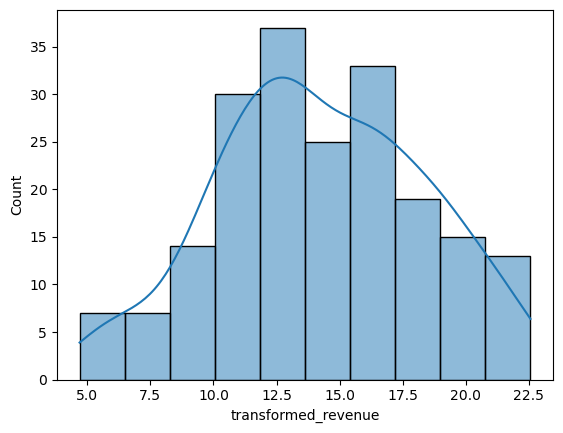

In [86]:
sns.histplot(df_revenue.transformed_revenue, kde = True)